In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from datetime import datetime
import numpy as np
import pickle

In [5]:
allDmc=pd.read_csv("ALLDMC.csv",names = ["type","actual", "predicted"])

In [27]:
allDmc["difference"] = allDmc.predicted - allDmc.actual

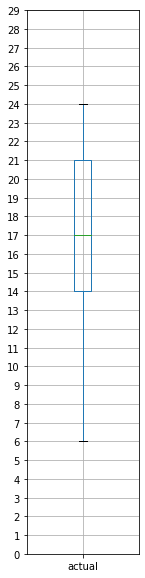

In [28]:
ax1=allDmc.boxplot(figsize=(2,10),column="actual",showfliers=True)
ax1.set_yticks(np.arange(0,30,1))
plt.show()

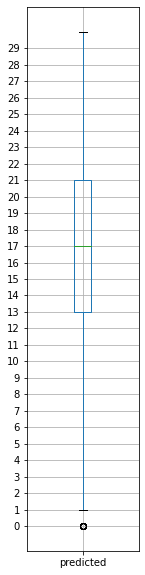

In [29]:
ax1=allDmc.boxplot(figsize=(2,10),column="predicted",showfliers=True)
ax1.set_yticks(np.arange(0,30,1))
plt.show()

In [30]:
allDmc["ratings"] = allDmc["actual"].apply(lambda x: 0)
def create_ratings(x):
    rating = 0;
    if(x==0):
        rating =3
    elif(x>0):
        if(x<=2):
            rating = 4
        elif(x>2 and x<=4):
            rating = 5
        else:
            rating = 6
    elif(x<0):
        if(x>=-3):
            rating = 2
        else:
            rating = 1
        
    return rating    
allDmc["ratings"]=allDmc.difference.apply(create_ratings)

In [31]:
allDmc

,type,actual,predicted,difference,ratings
0,0,20,25,5,6
1,0,9,4,-5,1
2,0,9,5,-4,1
3,0,21,22,1,4
4,0,13,14,1,4
...,...,...,...,...,...
21865,4,18,13,-5,1
21866,4,18,23,5,6
21867,4,21,25,4,5
21868,4,22,22,0,3


In [32]:
allDmc.corr()

,type,actual,predicted,difference,ratings
type,1.000000,0.292710,0.228210,0.002111,0.003539
actual,0.292710,1.000000,0.776069,0.001543,0.002527
predicted,0.228210,0.776069,1.000000,0.631844,0.620130
difference,0.002111,0.001543,0.631844,1.000000,0.980216
ratings,0.003539,0.002527,0.620130,0.980216,1.000000


In [4]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [63]:
X = allDmc[["difference"]].values
Y = allDmc["ratings"].values

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [65]:
model = ExtraTreesClassifier(criterion="gini")
model.fit(X,Y)
print(model.feature_importances_)
y_predict=model.predict(x_test)

#print("Classification Report: \n%s\n" %classification_report(y_predict,y_test))
result = str(accuracy_score(y_predict,y_test)*100)+str("%")
print("Accuracy: \n%s\n"%result)
#print("Confusion Matrix: \n%s" %confusion_matrix(y_predict,y_test))

[1.]
Accuracy: 
100.0%



In [66]:
model = DecisionTreeClassifier()
fit = model.fit(X,Y)
y_pred = fit.predict(x_test)

result = str(accuracy_score(y_pred,y_test)*100)+str("%")
print("Accuracy: \n%s\n"%result)

Accuracy: 
100.0%



In [67]:
model = RandomForestClassifier()
fit = model.fit(X,Y)
y_pred = fit.predict(x_test)

result = str(accuracy_score(y_pred,y_test)*100)+str("%")
print("Accuracy: \n%s\n"%result)

Accuracy: 
100.0%



In [68]:
model = RandomForestClassifier()
fit = model.fit(X,Y)
y_pred = fit.predict(x_test)

result = str(accuracy_score(y_pred,y_test)*100)+str("%")
print("Accuracy: \n%s\n"%result)

Accuracy: 
100.0%



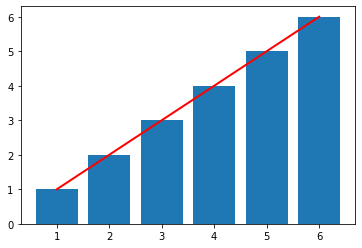

In [69]:
plt.plot(y_test, y_pred, color='red', linewidth=2)
plt.bar(y_test, y_pred)
plt.show()

In [2]:
import pickle

In [73]:
# save the classifier
with open('classifier.pkl', 'wb') as fid:
    pickle.dump(model, fid)    

In [1]:
# load it again
with open('classifier.pkl', 'rb') as fid:
    model = pickle.load(fid)

NameError: name 'pickle' is not defined

In [82]:
result = model.predict([[4]])

In [83]:
result[0]

5